## top_10000-most-popular-movies-from-imdb

<b>Model Developed by </b><br>
Name: <b>Umair Ali</b> <br>
Contact: <b>+923480233673</b><br>
Email: <b>uape00@gmail.com</b><br>
GitHub: <b> https://github.com/1umairali/models</b>

Developed a comprehensive data analysis project using a dataset of the top 10,000 most popular movies from IMDb. The project involved data cleaning, exploratory data analysis (EDA), and visualizations using Python libraries such as Pandas, Matplotlib, and Seaborn. Extracted insights into trends in movie ratings, genres, release years, and other key metrics. The analysis helped highlight correlations between popularity, ratings, and other attributes of successful films.

In [1]:
import numpy as np  # for numeric calculation
import pandas as pd  # for data analysis and manupulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization

In [2]:
url = "https://raw.githubusercontent.com/1umairali/models/main/imdb_10000_popular_movies/top_10000_most_popular_movies_from_imdb_dataset.csv"
orignal_df = pd.read_csv(url)
orignal_df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,374473,"I, Daniel Blake",2016-10-21,['Drama'],English,7.7,1220,10.774,"A middle aged carpenter, who requires state we...",0,"['Why Not Productions', 'Wild Bunch', 'Sixteen...",15793051,100,NaN
9996,16774,Hellboy Animated: Sword of Storms,2006-10-28,"['TV Movie', 'Fantasy', 'Animation', 'Action',...",English,6.3,99,12.739,A folklore professor becomes unwittingly posse...,0,"['IDT Entertainment', 'Film Roman']",0,73,NaN
9997,13564,Return to House on Haunted Hill,2007-10-03,"['Horror', 'Thriller']",English,5.6,263,12.769,Eight years have passed since Sara Wolfe and E...,0,"['Dark Castle Entertainment', 'Warner Premiere']",0,81,NaN
9998,482204,My Sister-in-law's Job,2017-08-31,"['Drama', 'Romance']",Korean,5.0,5,10.425,An erotic film that depicts the dangerous rela...,0,[],0,89,NaN


In [3]:
orignal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 13  tagline               7241 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [4]:
orignal_df.isnull().sum()

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [5]:
#copy orignal dataframe
df = orignal_df.copy()

In [6]:
# drop tagling column, contains max NaN values.
df = df.drop(['tagline'], axis=1)

# convert "release_date" data type 'object' to 'datetime'
df['release_date'] = pd.to_datetime(df['release_date'])
df['genres'] = df['genres'].astype('string')

# take median() of 'release_date' column and fill NaN value
df['release_date'].fillna(df['release_date'].median(), inplace=True)

# drop NaN value rows from 'overview' columns 
df.dropna(subset=['overview'], inplace=True)

May be I didn't fill NaN values well

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9923 non-null   int64         
 1   title                 9923 non-null   object        
 2   release_date          9923 non-null   datetime64[ns]
 3   genres                9923 non-null   string        
 4   original_language     9923 non-null   object        
 5   vote_average          9923 non-null   float64       
 6   vote_count            9923 non-null   int64         
 7   popularity            9923 non-null   float64       
 8   overview              9923 non-null   object        
 9   budget                9923 non-null   int64         
 10  production_companies  9923 non-null   object        
 11  revenue               9923 non-null   int64         
 12  runtime               9923 non-null   int64         
dtypes: datetime64[ns](1), f

In [8]:
df.isnull().sum()

id                      0
title                   0
release_date            0
genres                  0
original_language       0
vote_average            0
vote_count              0
popularity              0
overview                0
budget                  0
production_companies    0
revenue                 0
runtime                 0
dtype: int64

## Upcomming Movies

In [9]:
upcomming_movies_df = df.copy()

upcomming_movies_df.sort_values(by=['release_date'], inplace=True, ascending=True)
upcomming_movies = upcomming_movies_df.loc[(df['release_date'] >= '2023-09-15')].reset_index()
upcomming_movies = upcomming_movies.drop(['vote_average','vote_count','budget','revenue','runtime'], axis=1)
upcomming_movies.head()

,index,id,title,release_date,genres,original_language,popularity,overview,production_companies
0,2976,299054,The Expendables 4,2023-09-21,"['Action', 'Adventure', 'Thriller', 'War']",English,22.788,The Expendables square up against an arms deal...,"['Millennium Films', 'Campbell Grobman Films']"
1,7558,893723,PAW Patrol: The Mighty Movie,2023-09-28,"['Animation', 'Family', 'Comedy']",English,11.993,A magical meteor crash lands in Adventure City...,"['Nickelodeon Movies', 'Spin Master', 'Paramou..."
2,7467,539972,Kraven the Hunter,2023-10-04,"['Action', 'Science Fiction']",English,11.255,"Sergei Kravinoff is a big game hunter, who tak...","['Marvel Entertainment', 'Columbia Pictures', ..."
3,5587,466420,Killers of the Flower Moon,2023-10-06,"['Crime', 'Drama', 'Thriller']",English,14.445,When oil is discovered in 1920s Oklahoma under...,"['Appian Way', 'Imperative Entertainment', 'Si..."
4,8260,807172,The Exorcist: Believer,2023-10-11,"['Horror', 'Thriller']",English,12.623,The father of a possessed child seeks out the ...,"['Blumhouse Productions', 'Morgan Creek Produc..."


## Released Movies

In [10]:
released_movies_df = df.copy()

released_movies_df.sort_values(by=['release_date'], inplace=True, ascending=False)
released_movies = released_movies_df.loc[(df['release_date'] <= '2023-09-14')].reset_index()
released_movies.head()

,index,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime
0,2125,820525,After Everything,2023-09-13,"['Romance', 'Drama']",English,0.0,0,36.319,"The sequel to 'After Ever Happy' (2022), which...",14000000,"['Voltage Pictures', 'Wattpad']",0,0
1,854,968051,The Nun II,2023-09-05,"['Horror', 'Mystery']",English,0.0,0,45.084,Four years after the events at the Abbey of St...,0,"['New Line Cinema', 'Atomic Monster', 'The Saf...",0,0
2,1062,926393,The Equalizer 3,2023-08-30,"['Action', 'Thriller', 'Crime']",English,0.0,0,48.772,Robert McCall finds himself at home in Souther...,0,"['Escape Artists', 'Columbia Pictures', 'Fuqua...",0,0
3,217,912908,Strays,2023-08-17,"['Comedy', 'Adventure']",English,0.0,0,146.598,"When Reggie, a naïve, relentlessly optimistic ...",0,"['Universal Pictures', 'PictureStart', 'Lord M...",0,93
4,3476,565770,Blue Beetle,2023-08-16,"['Action', 'Science Fiction']",English,0.0,0,22.946,Recent college grad Jaime Reyes returns home f...,120000000,"['Warner Bros. Pictures', 'The Safran Company'...",0,0


In [11]:
# movies language
df.original_language.unique()

array(['English', 'French', 'Dutch', 'Spanish', 'Korean', 'Japanese',
       'Finnish', 'Ukrainian', 'Norwegian', 'Estonian', 'cn', 'Polish',
       'Russian', 'German', 'Chinese', 'Italian', 'Basque', 'Thai',
       'Turkish', 'Swedish', 'Icelandic', 'Tagalog', 'Bengali', 'Arabic',
       'Tamil', 'Telugu', 'Romanian', 'Indonesian', 'Galician', 'Danish',
       'Macedonian', 'Portuguese', 'Vietnamese', 'Catalan', 'Hindi',
       'Persian', 'Hebrew', 'Serbian', 'Malayalam', 'Greek', 'Hungarian',
       'Czech', 'Norwegian Bokmal', 'xx', 'Kannada', 'Irish', 'Khmer',
       'sh', 'Dzongkha', 'Panjabi', 'Sundanese'], dtype=object)

## Analyze movies according to original language

In [12]:
# Language and total movies
df.original_language.value_counts()

original_language
English             7229
Japanese             697
Korean               388
Spanish              336
French               298
Chinese              151
Italian              148
cn                   134
German                83
Russian               69
Tagalog               46
Hindi                 36
Norwegian             32
Danish                30
Portuguese            29
Polish                28
Thai                  26
Dutch                 24
Swedish               23
Indonesian            17
Turkish               17
Tamil                  9
Telugu                 9
Finnish                6
Arabic                 4
Romanian               4
Ukrainian              4
Greek                  4
Malayalam              3
Basque                 3
Vietnamese             3
Hungarian              3
Persian                3
Khmer                  2
Kannada                2
xx                     2
Czech                  2
Serbian                2
Hebrew                 2
Catalan

In [13]:
# language and total movies in dataframe
language_count = df.original_language.value_counts().to_frame().reset_index()
language_count.columns = ["original_language","total"]
language_count

,original_language,total
0,English,7229
1,Japanese,697
2,Korean,388
3,Spanish,336
4,French,298
5,Chinese,151
6,Italian,148
7,cn,134
8,German,83
9,Russian,69


There are a lot more english entries, as expected, so we will analyse the overall number of movies in two ways: comparing english movies with the rest and comparing the data without the english spoken movies.

In [14]:
#total english movies and all other languages movies 
language_total = df["original_language"].value_counts()
total = language_total.sum()
total_english = language_total.loc["English"]
total_others = total - total_english
print(total_english, total_others)

7229 2694


In [15]:
# English language and Other language in dataframe
eng_and_others = {'language' : ['English','Others'],
        'total' : [total_english, total_others]}
eng_and_others = pd.DataFrame(eng_and_others)
eng_and_others

,language,total
0,English,7229
1,Others,2694


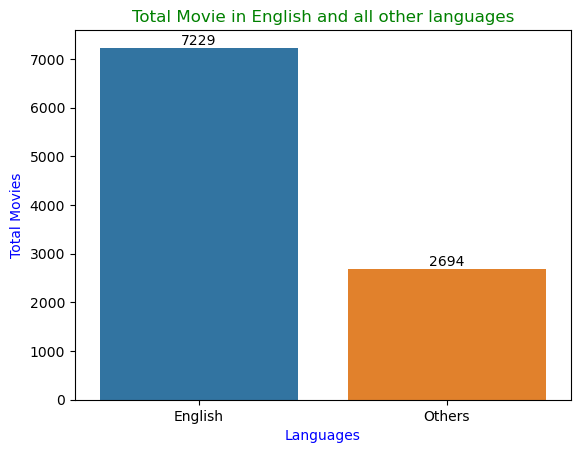

In [16]:
# English and other languages in barplot
ax = sns.barplot(data = eng_and_others, x = 'language', y='total')

# show values on bar
for i in ax.containers:
    ax.bar_label(i,)

# title and labels
plt.title('Total Movie in English and all other languages',fontsize = 12, color='green')
plt.xlabel('Languages',fontsize = 10,color='blue')
plt.ylabel('Total Movies',fontsize = 10,color='blue')

plt.show()

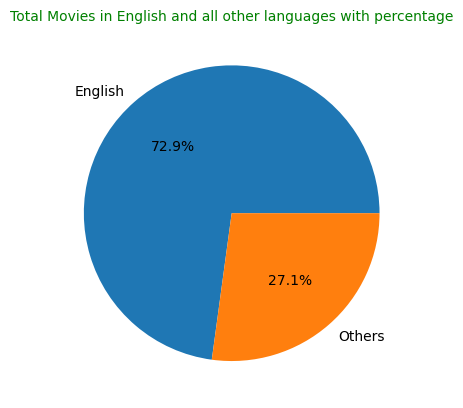

In [17]:
#Total Movies in English and all other languages with percentage
# pieplot
plt.pie(eng_and_others.total, labels = eng_and_others.language,  autopct='%1.1f%%')

# for title
plt.title('Total Movies in English and all other languages with percentage',fontsize = 10, color='green')
plt.show()

As we can see by the visualizations, the number of english speaking movies is too high compared to the other, so it's interesting to analyse the languages apart from english.

## All languages movies count

In [18]:
# all languages movie count
all_lang_movies_count = df.original_language.value_counts().to_frame().reset_index()
all_lang_movies_count.columns = ["original_language","total"]
all_lang_movies_count.head()

,original_language,total
0,English,7229
1,Japanese,697
2,Korean,388
3,Spanish,336
4,French,298


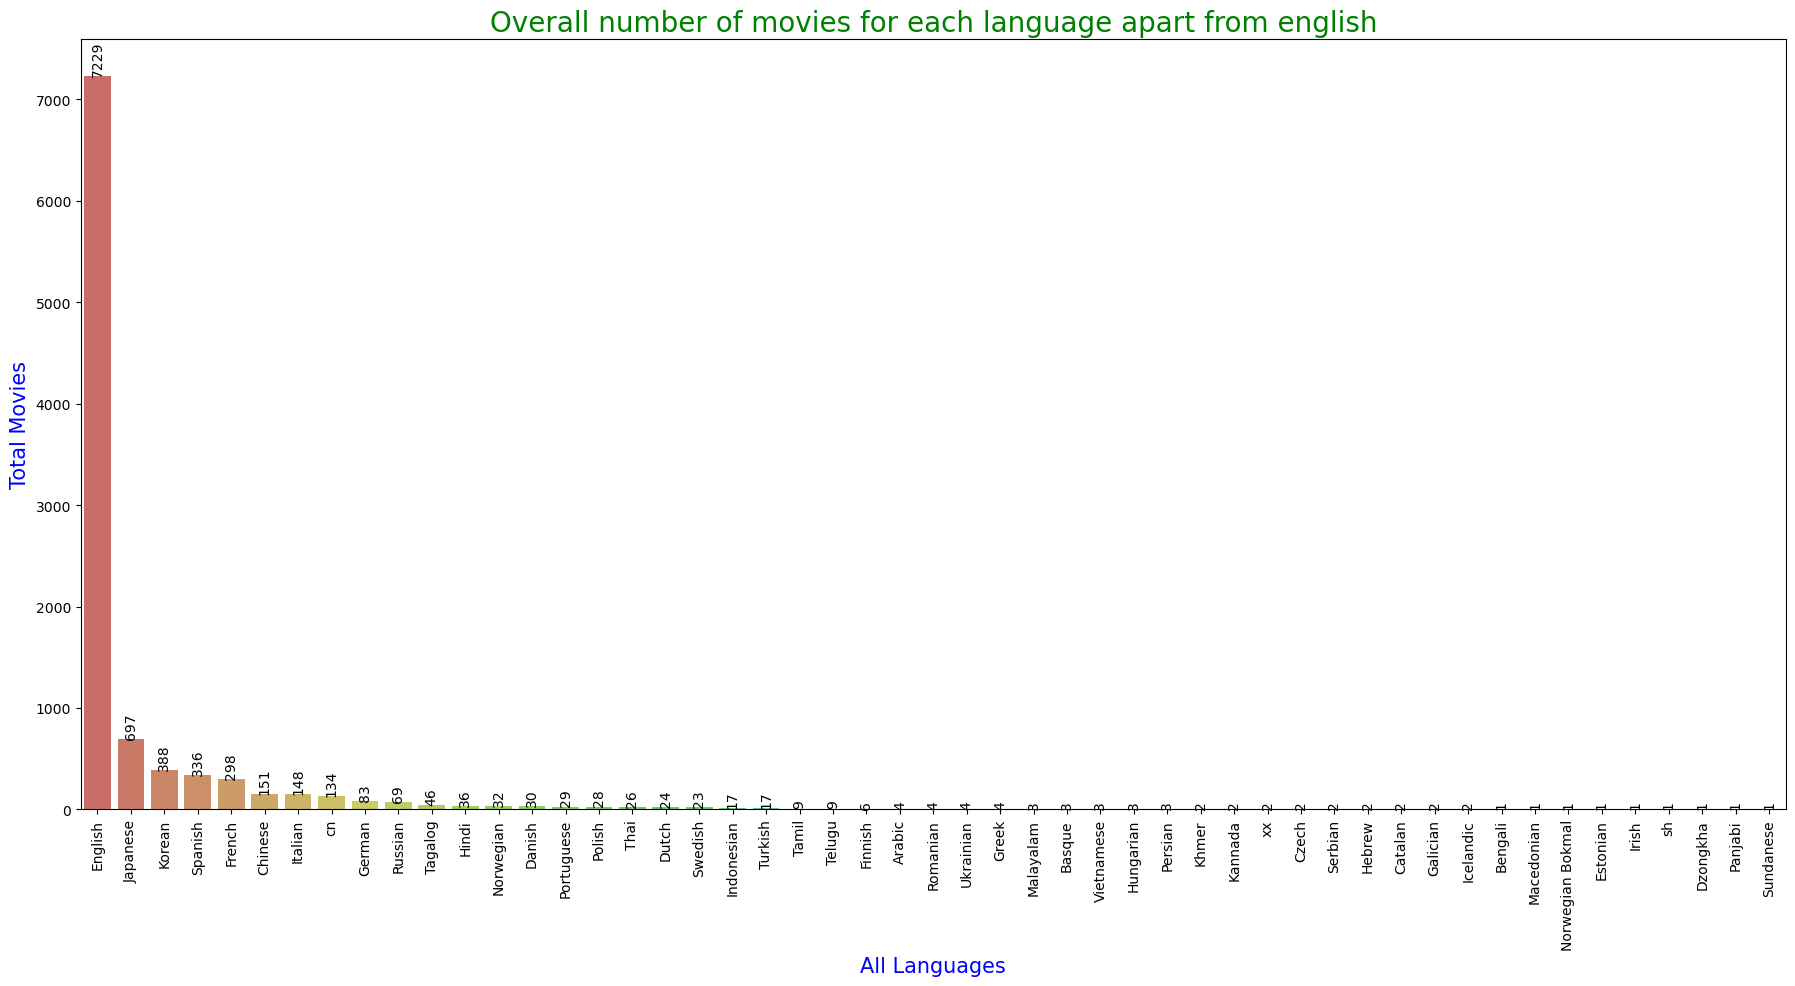

In [19]:
plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'total', data = all_lang_movies_count, palette = 'hls')

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d',rotation = 90)

# titel and lables
plt.title('Overall number of movies for each language apart from english',fontsize = 20, color='green')
plt.xlabel('All Languages',fontsize = 15,color='blue')
plt.ylabel('Total Movies',fontsize = 15,color='blue')
plt.xticks(rotation = 90)

plt.show()

## All languages movies count except English

In [20]:
# all languages movie except english
non_english = df.query("original_language != 'English'").original_language.value_counts().to_frame().reset_index()
non_english.columns = ["original_language","total"]
non_english.head()

,original_language,total
0,Japanese,697
1,Korean,388
2,Spanish,336
3,French,298
4,Chinese,151


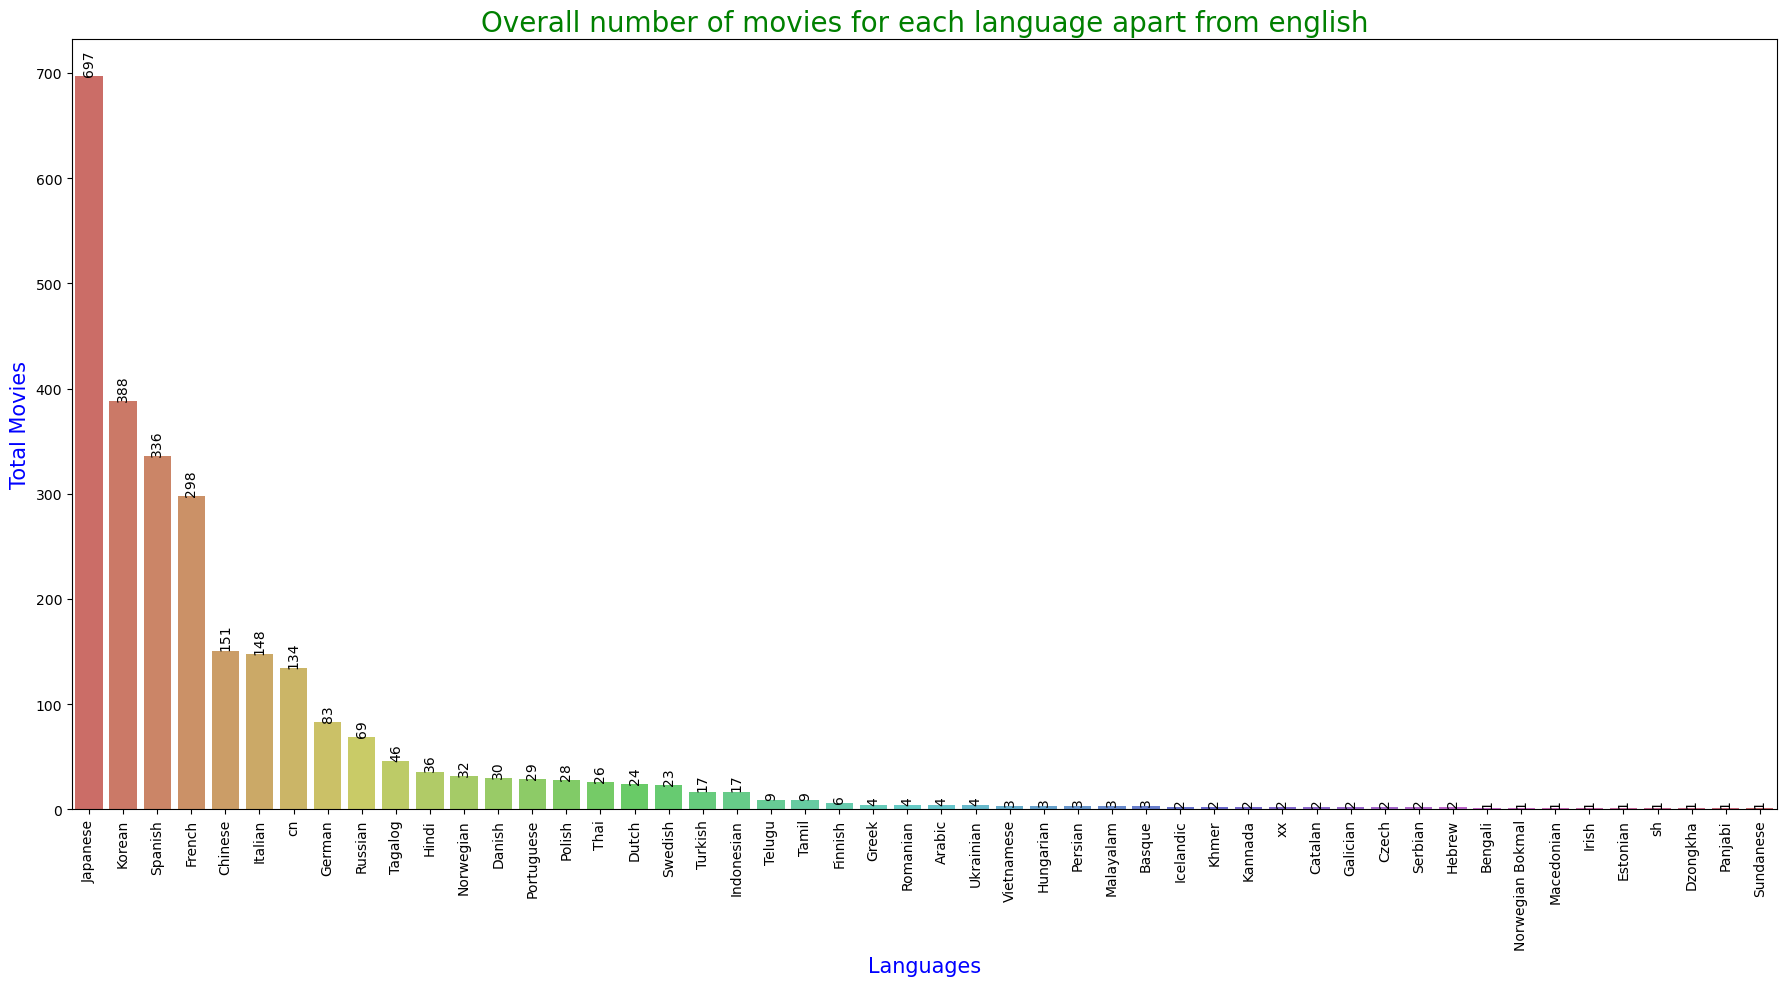

In [21]:
plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'total', data = non_english, palette = 'hls')

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d',rotation = 90)

# title and lables
plt.title('Overall number of movies for each language apart from english',fontsize = 20, color='green')
plt.xlabel('Languages',fontsize = 15,color='blue')
plt.ylabel('Total Movies',fontsize = 15,color='blue')
plt.xticks(rotation = 90)

plt.show()

The first five are: Japanese, Korean, Spanish, French, Chinese. Those are the languages with the most movies in this dataframe, apart from english.

## Analysing the budget of the movies for each language

In [22]:
df.budget.describe()

count    9.923000e+03
mean     1.963073e+07
std      3.891562e+07
min      0.000000e+00
25%      0.000000e+00
50%      5.650000e+05
75%      2.200000e+07
max      5.793304e+08
Name: budget, dtype: float64

In [23]:
df.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime'],
      dtype='object')

In [24]:
# budget and all languages columns
budget_lan = df[['budget','original_language']]
budget_lan

,budget,original_language
0,18000000,English
1,200000000,English
2,100000000,English
3,0,English
4,125000000,English
...,...,...
9995,0,English
9996,0,English
9997,0,English
9998,0,Korean


index 3 and other's budget is not NaN. during entry values given as 0.

In [25]:
# drop 0 budget rows
budget_lan_drop = budget_lan.query('budget == 0').index
budget_lan.drop(budget_lan_drop,axis=0,inplace = True)
budget_lan

C:\Users\Umair Ali\AppData\Local\Temp\ipykernel_8724\4214584850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_lan.drop(budget_lan_drop,axis=0,inplace = True)


,budget,original_language
0,18000000,English
1,200000000,English
2,100000000,English
4,125000000,English
5,460000000,English
...,...,...
9979,786801,Italian
9980,12000000,English
9982,700000,English
9989,7000000,English


In [26]:
# sum of budget by Language
total_budget_lan = budget_lan.groupby("original_language").sum().reset_index()
total_budget_lan_sorted = total_budget_lan.sort_values("budget",ascending=False).reset_index()
total_budget_lan_sorted

,index,original_language,budget
0,6,English,186667004646
1,2,Chinese,2277902381
2,8,French,1803932728
3,15,Japanese,1180885919
4,17,Korean,607618972
5,31,cn,422308722
6,11,Hindi,361455922
7,24,Spanish,344659224
8,23,Russian,235688736
9,14,Italian,225622322


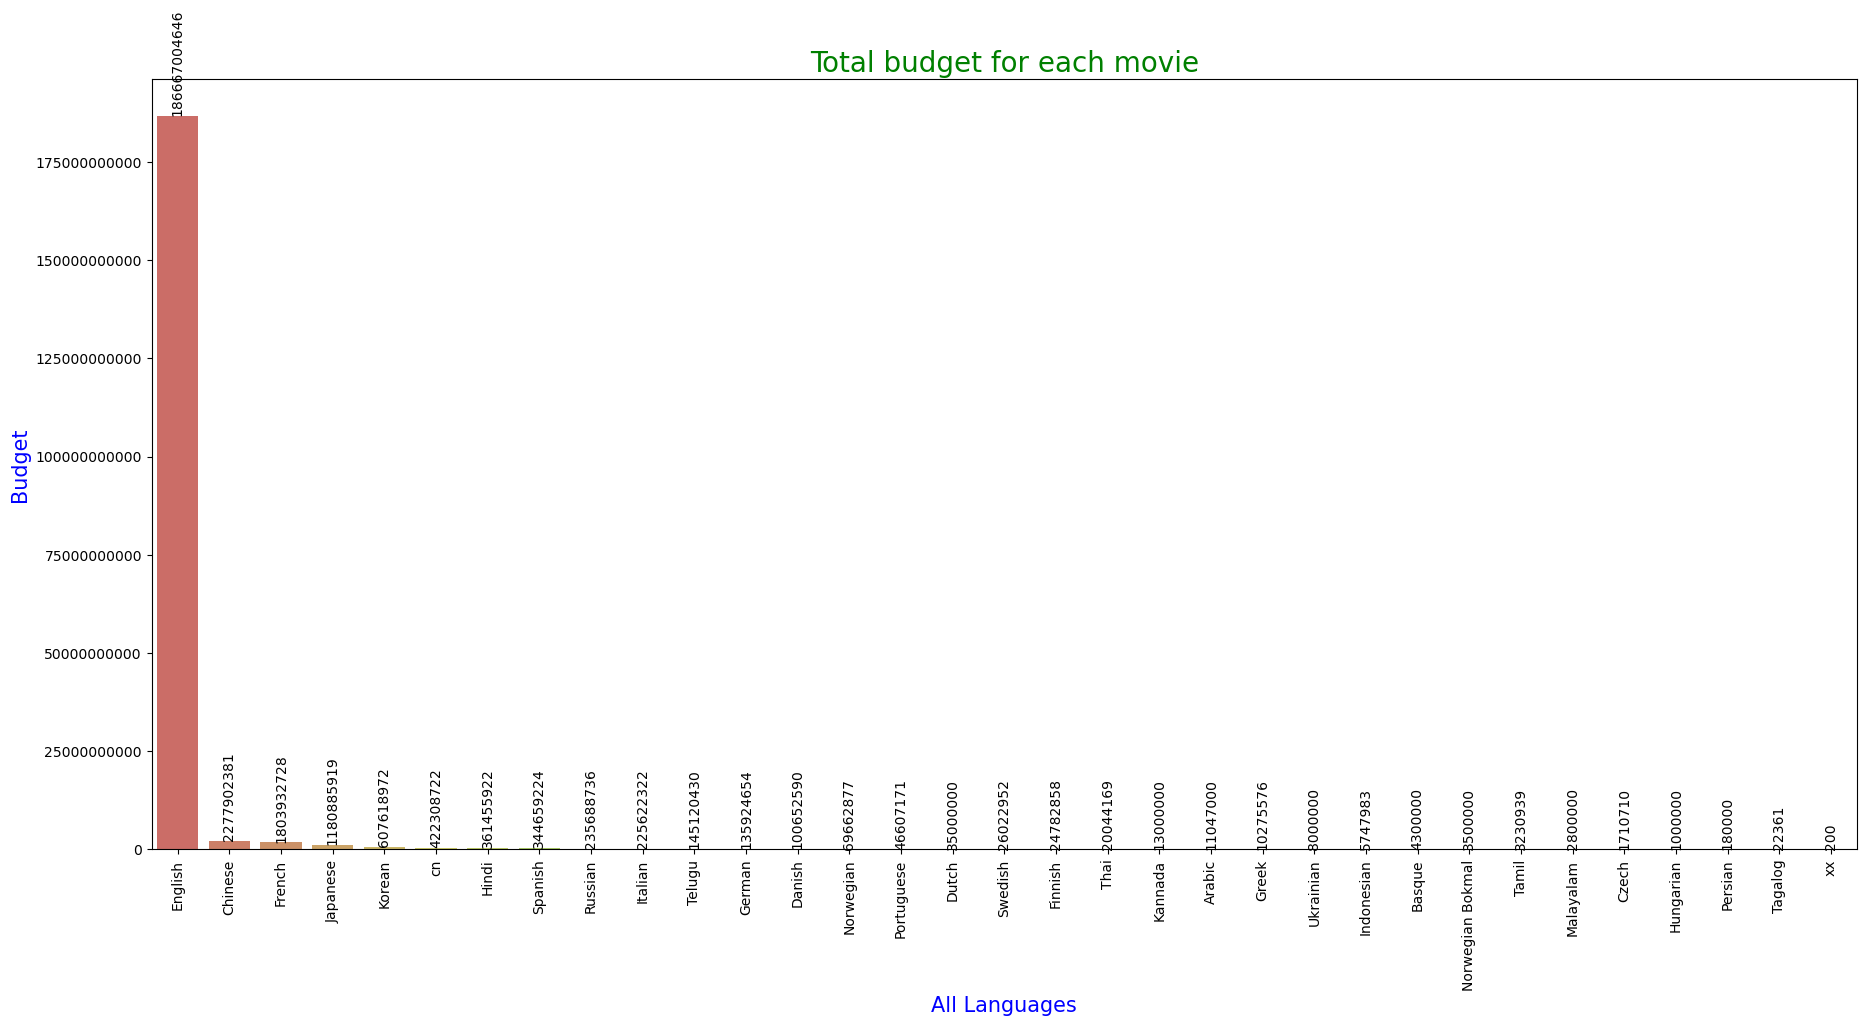

In [27]:
plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'budget', data = total_budget_lan_sorted, palette = 'hls')

# y-ticks values in complete figures
plt.ticklabel_format(style='plain', axis='y')

# bar labels/values in complete figures
ax.bar_label(ax.containers[0], fmt = '%d',rotation = 90)


plt.title('Total budget for each movie',fontsize = 20, color='green')
plt.xlabel('All Languages',fontsize = 15,color='blue')
plt.ylabel('Budget',fontsize = 15,color='blue')
plt.xticks(rotation = 90)
plt.show()


As expected, the total budget of the english speaking movies is too high, because they have too much entries. We will also analyse the total budget from the movies excluding the english ones as well.

In [28]:
# total budget except english language
total_budget_non_english = budget_lan.query("original_language != 'English'")
total_budget_non_english.head()

,budget,original_language
25,12300000,Spanish
48,6200000,Finnish
67,1000000,Ukrainian
86,15800000,Japanese
124,20000000,German


In [29]:
# total budget except english language in ascending order
total_budget_non_english_sorted = total_budget_non_english.groupby("original_language").sum().reset_index()
total_budget_non_english_sorted = total_budget_non_english_sorted.sort_values("budget",ascending=False).reset_index()
total_budget_non_english_sorted.head()

,index,original_language,budget
0,2,Chinese,2277902381
1,7,French,1803932728
2,14,Japanese,1180885919
3,16,Korean,607618972
4,30,cn,422308722


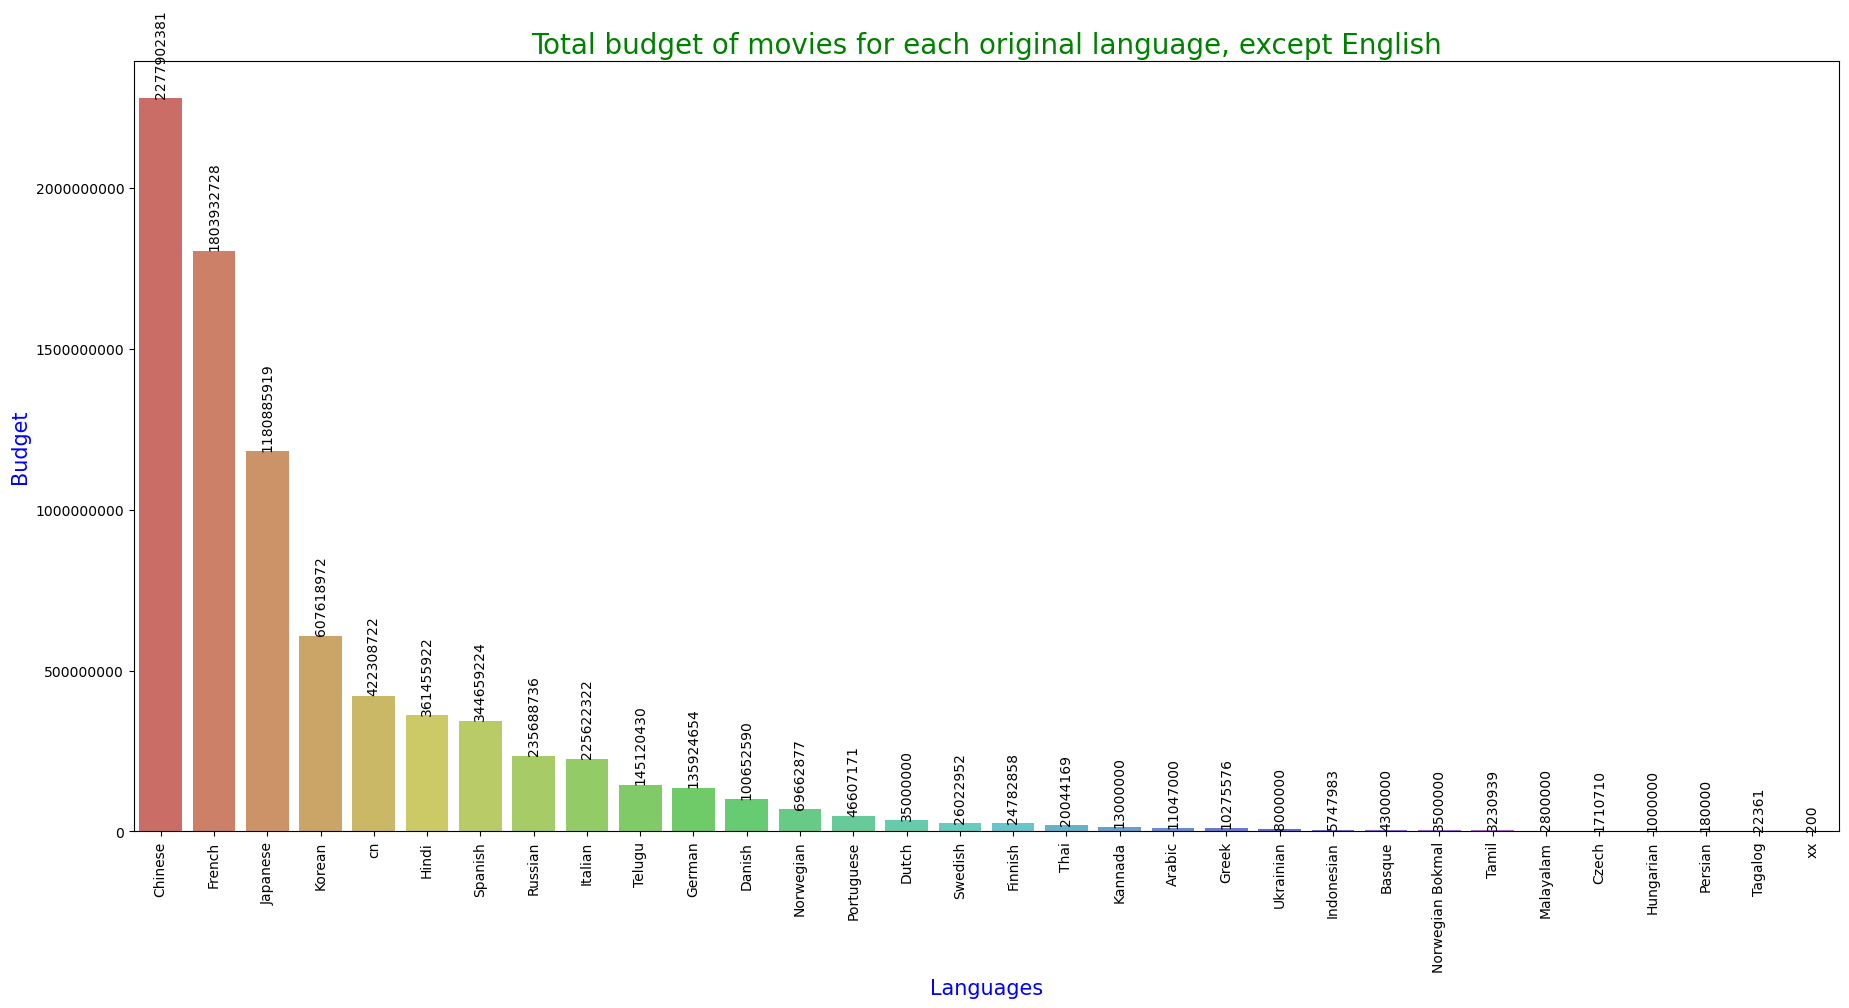

In [30]:
#plot of total budget except english

plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'budget', data = total_budget_non_english_sorted, palette = 'hls')

# y_ticks values/labels in complete figures
plt.ticklabel_format(style='plain', axis='y')

# bar values/labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d',rotation = 90)

#title and labels
plt.title('Total budget of movies for each original language, except English',fontsize = 20, color='green')
plt.xlabel('Languages',fontsize = 15,color='blue')
plt.ylabel('Budget',fontsize = 15,color='blue')
plt.xticks(rotation = 90)
plt.show()


The first five are: Chinese, French, Japanese, Korean, and cn. Those are the languages with the most budget movies in this database, apart from english.

In [31]:
# mean/average budget of all languages

budget_lan_mean = budget_lan.groupby("original_language").mean().reset_index()
budget_lan_mean_sort = budget_lan_mean.sort_values("budget",ascending=False).reset_index()
budget_lan_mean_sort

,index,original_language,budget
0,2,Chinese,4.745630e+07
1,6,English,4.084617e+07
2,28,Telugu,2.902409e+07
3,5,Dutch,1.750000e+07
4,11,Hindi,1.642981e+07
5,8,French,1.610654e+07
6,22,Portuguese,1.553572e+07
7,15,Japanese,1.422754e+07
8,16,Kannada,1.300000e+07
9,31,cn,1.279723e+07


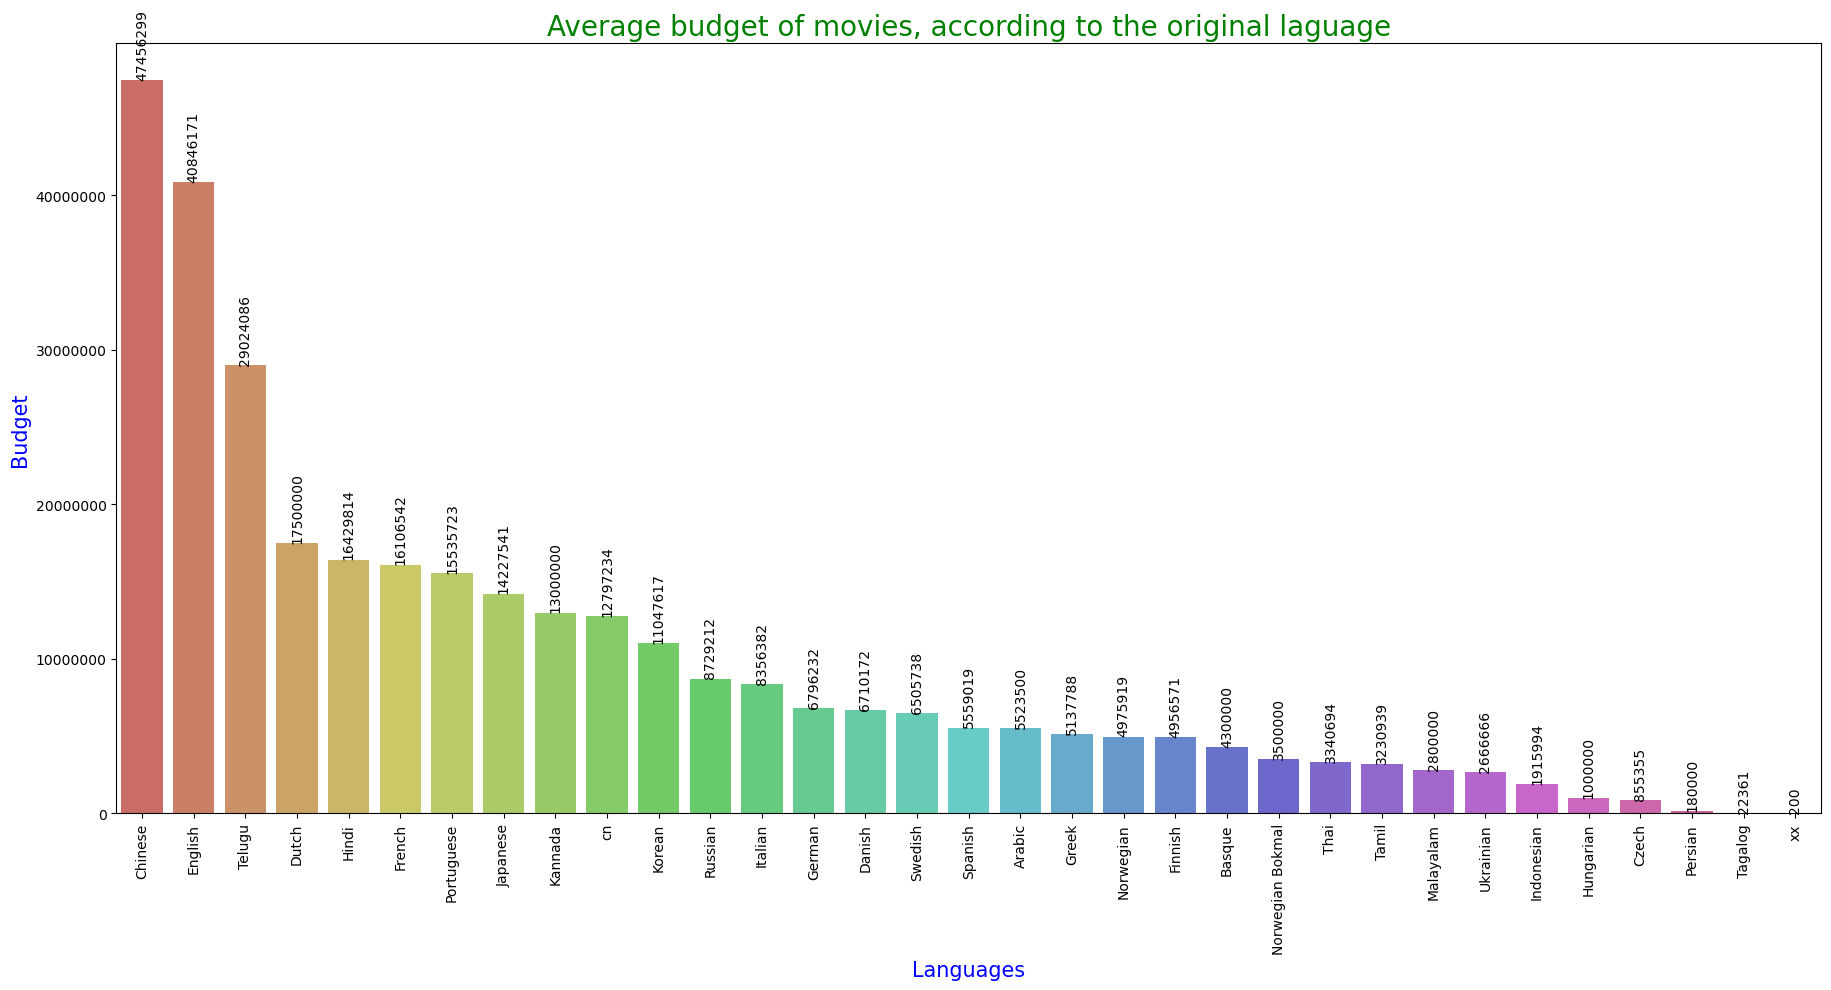

In [32]:
# plot # mean/average budget of all languages

plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'budget', data = budget_lan_mean_sort, palette = 'hls')

# y_ticks values/budget in complete figures
plt.ticklabel_format(style='plain', axis='y')
# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d',rotation = 90)

# title and labels
plt.title('Average budget of movies, according to the original laguage',fontsize = 20, color='green')
plt.xlabel('Languages',fontsize = 15,color='blue')
plt.ylabel('Budget',fontsize = 15,color='blue')
plt.xticks(rotation = 90)
plt.show()

If we compare the average budget for each language, there is no need to separate languages, because no one have a really outstanding average. The first five are: Chinese, English, Telugu, Dutuch, and Hindi.

## Analysing the average voting grade for each original language

In [33]:
df.vote_average.describe()

count    9923.000000
mean        6.348201
std         1.371006
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64

We can see that more than 50% of the movies have a higher average voting than the mean, but just 25% of the movies have a high grade that is 5.9

In [34]:
# get vote and language column
vote_lan = df[['vote_average','original_language']]
vote_lan.head()

,vote_average,original_language
0,7.4,English
1,6.6,English
2,7.5,English
3,7.2,English
4,6.8,English


In [35]:
# average/mean of vote by language, and sort by ascending order
vote_lan_mean = vote_lan.groupby("original_language").mean().reset_index()
vote_lan_mean_sorted = vote_lan_mean.sort_values("vote_average",ascending=False).reset_index()
vote_lan_mean_sorted

,index,original_language,vote_average
0,21,Irish,7.600000
1,24,Kannada,7.550000
2,5,Czech,7.550000
3,32,Persian,7.533333
4,8,Dzongkha,7.400000
5,46,Ukrainian,7.100000
6,18,Hungarian,7.000000
7,3,Catalan,6.850000
8,23,Japanese,6.790961
9,40,Swedish,6.778261


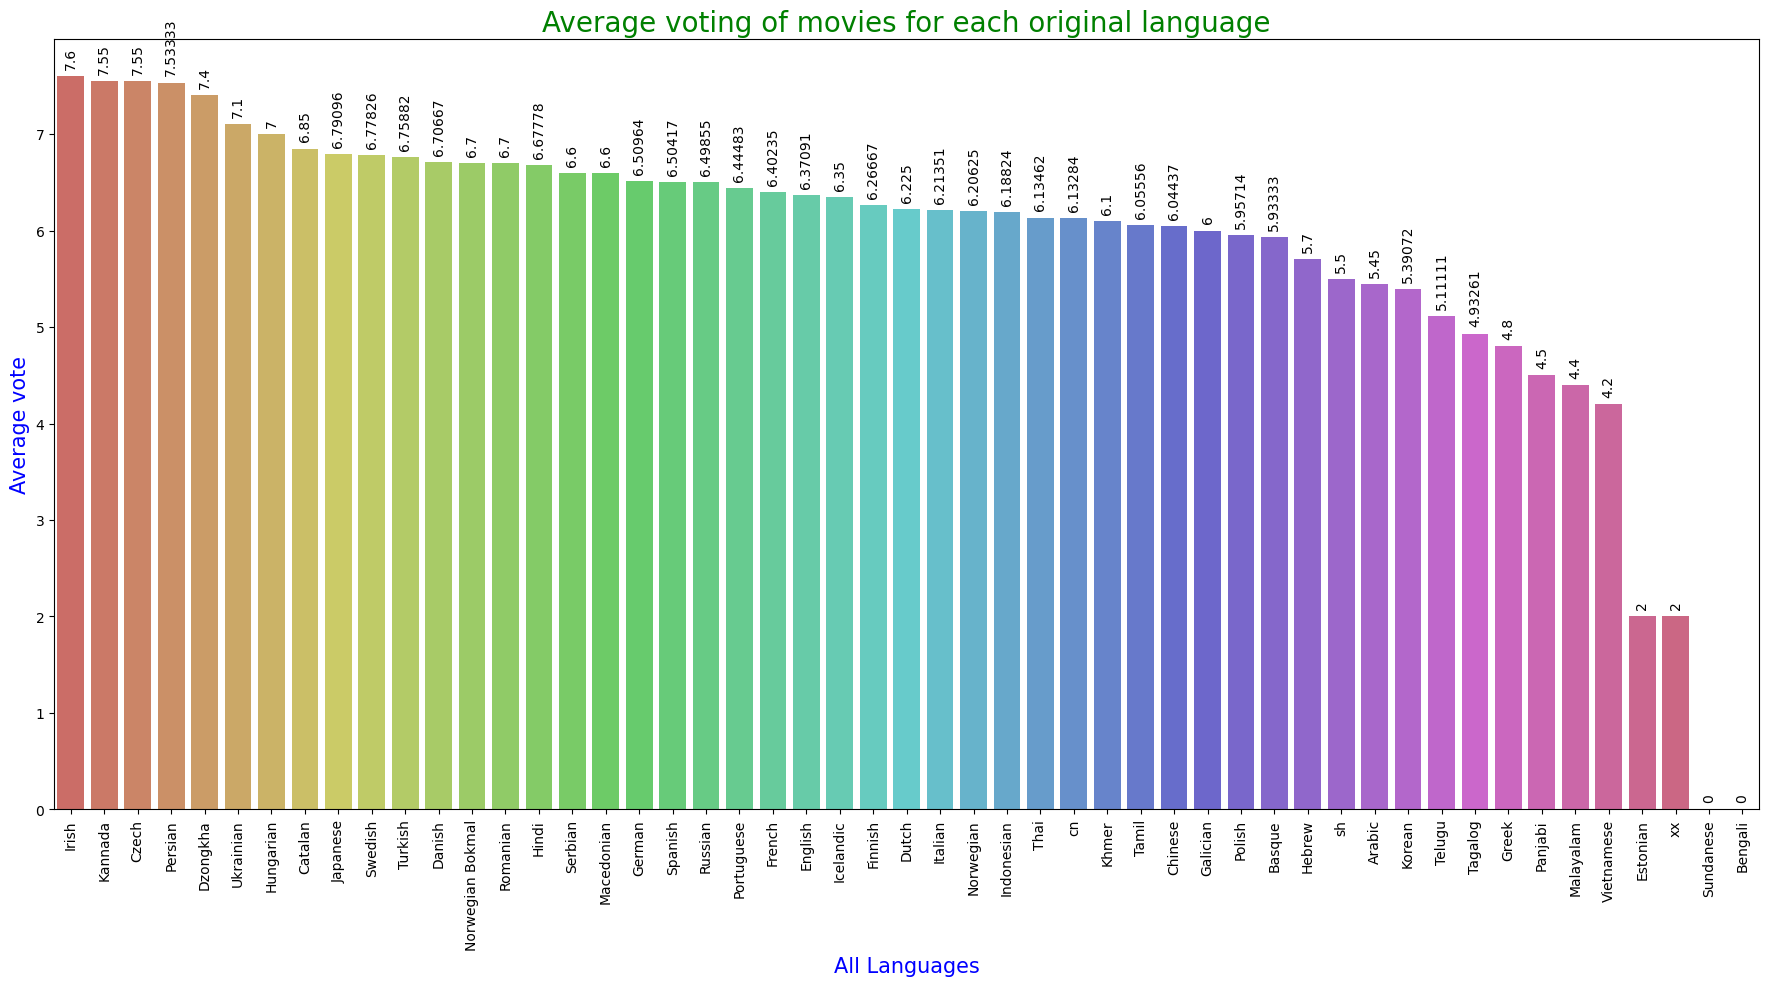

In [36]:
#vote average plot
plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'vote_average', data = vote_lan_mean_sorted, palette = 'hls')

# show values on bar
for i in ax.containers:
    ax.bar_label(i,rotation = 90, padding=5)

# title and labels
plt.title('Average voting of movies for each original language',fontsize = 20, color='green')
plt.xlabel('All Languages',fontsize = 15,color='blue')
plt.ylabel('Average vote',fontsize = 15,color='blue')
plt.xticks(rotation = 90)
plt.show()

They must really love that movie in Irish, because it is the leader in here as well. The other four higher are indonesian, hebrew, persian and arabic, again, mostly languages with few total entries in the data.

## Popularity

In [37]:
df.popularity.describe()

count    9923.000000
mean       31.550217
std       111.857228
min         7.219000
25%        13.541500
50%        17.626000
75%        27.175500
max      5089.969000
Name: popularity, dtype: float64

Popularity is a strange number, but seems like the higher the number, the most popular the movie is. The max value of popularity is much more higher than the average, but there are around 25% of the movies that have a higher popularity.

In [38]:
#get popularity and orignal_language column
pop_lan = df[['popularity','original_language']]
pop_lan.head()

,popularity,original_language
0,5089.969,English
1,4665.438,English
2,3935.550,English
3,2791.532,English
4,2702.593,English


In [39]:
# average/mean of popularity by language, and sort by ascending order
pop_lan_mean = pop_lan.groupby("original_language").mean().reset_index()
pop_lan_mean_sorted = pop_lan_mean.sort_values("popularity",ascending=False).reset_index()
pop_lan_mean_sorted

,index,original_language,popularity
0,10,Estonian,197.218000
1,2,Bengali,103.376000
2,11,Finnish,94.556000
3,46,Ukrainian,79.999750
4,19,Icelandic,77.614500
5,27,Macedonian,62.567000
6,1,Basque,55.991333
7,35,Romanian,54.136000
8,7,Dutch,52.384250
9,13,Galician,48.490000


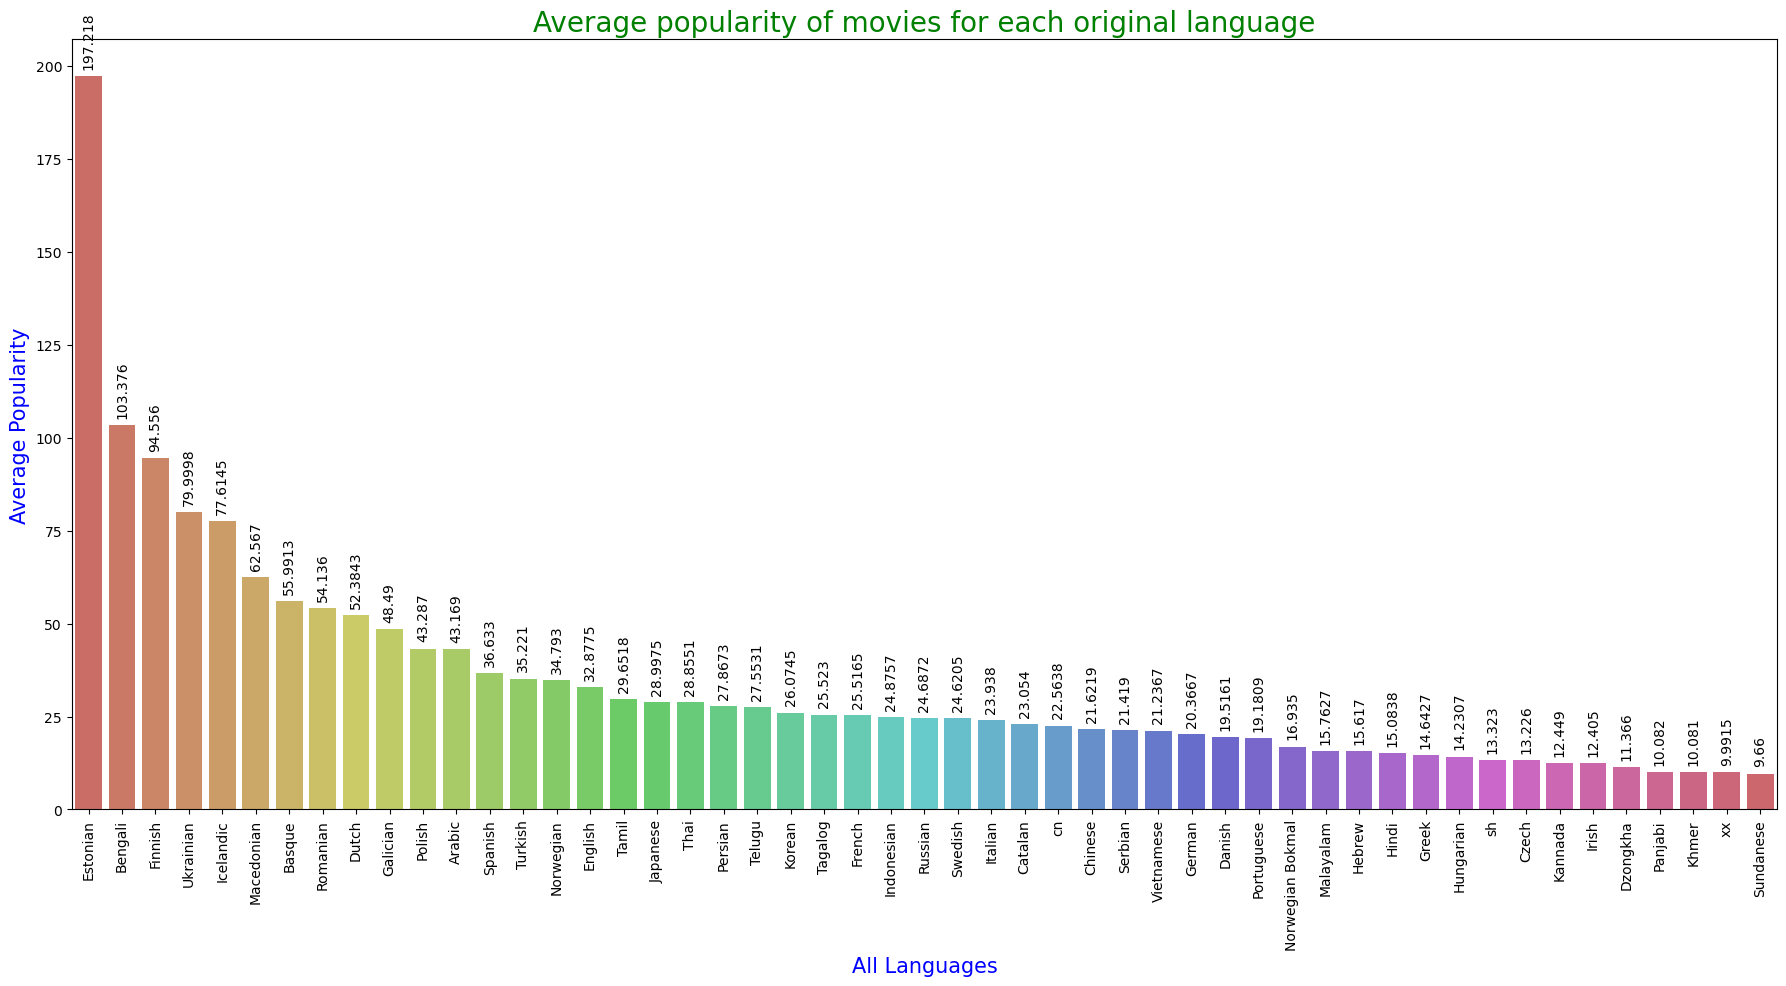

In [40]:
# mean/average popularity of orignal languages
plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'popularity', data = pop_lan_mean_sorted, palette = 'hls')

# values on bar
for i in ax.containers:
    ax.bar_label(i,rotation = 90, padding=5)

# title and labels
plt.title('Average popularity of movies for each original language',fontsize = 20, color='green')
plt.xlabel('All Languages',fontsize = 15,color='blue')
plt.ylabel('Average Popularity',fontsize = 15,color='blue')
plt.xticks(rotation = 90)
plt.show()

Here we have a top 5 consisting of: Estonian, Bengali, Finnish, Ukrainian, and Icelandic. I expected to see the average of the english movies to drop because of the high number of entries, but if they got a good average, must be because they have lots of popular movies in english.

## Revenue

In [41]:
df.revenue.describe()

count    9.923000e+03
mean     6.023300e+07
std      1.548025e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.165882e+06
75%      5.000625e+07
max      2.923706e+09
Name: revenue, dtype: float64

The average of revenue is much more higher than the median. That is also expected, mostly because the data has too much movies in english, and they have a tendency to have high profit movies in this language.

In [42]:
# Get revenues and orignal_language
rev_lan = df[['revenue','original_language']]
rev_lan.head()

,revenue,original_language
0,65675816,English
1,464566092,English
2,1121048165,English
3,0,English
4,133437105,English


In [43]:
# drop 0 revenue rows
rev_lan_drop = rev_lan.query('revenue == 0').index
rev_lan.drop(rev_lan_drop,axis=0,inplace = True)
rev_lan

C:\Users\Umair Ali\AppData\Local\Temp\ipykernel_8724\3560680913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_lan.drop(rev_lan_drop,axis=0,inplace = True)


,revenue,original_language
0,65675816,English
1,464566092,English
2,1121048165,English
4,133437105,English
5,2319331580,English
...,...,...
9986,32511047,English
9989,21600000,English
9990,29066681,English
9995,15793051,English


In [44]:
# average/mean of revenue by language, and sort by ascending order
rev_lan_mean = rev_lan.groupby("original_language").mean().reset_index()
rev_lan_mean_sorted = rev_lan_mean.sort_values("revenue",ascending=False).reset_index()
rev_lan_mean_sorted

,index,original_language,revenue
0,1,Chinese,1.634737e+08
1,5,English,1.223319e+08
2,32,Telugu,1.150008e+08
3,17,Kannada,9.041075e+07
4,10,Hindi,6.058360e+07
5,29,Swedish,3.656285e+07
6,24,Portuguese,3.637469e+07
7,18,Korean,3.555322e+07
8,16,Japanese,3.549369e+07
9,0,Arabic,3.431277e+07


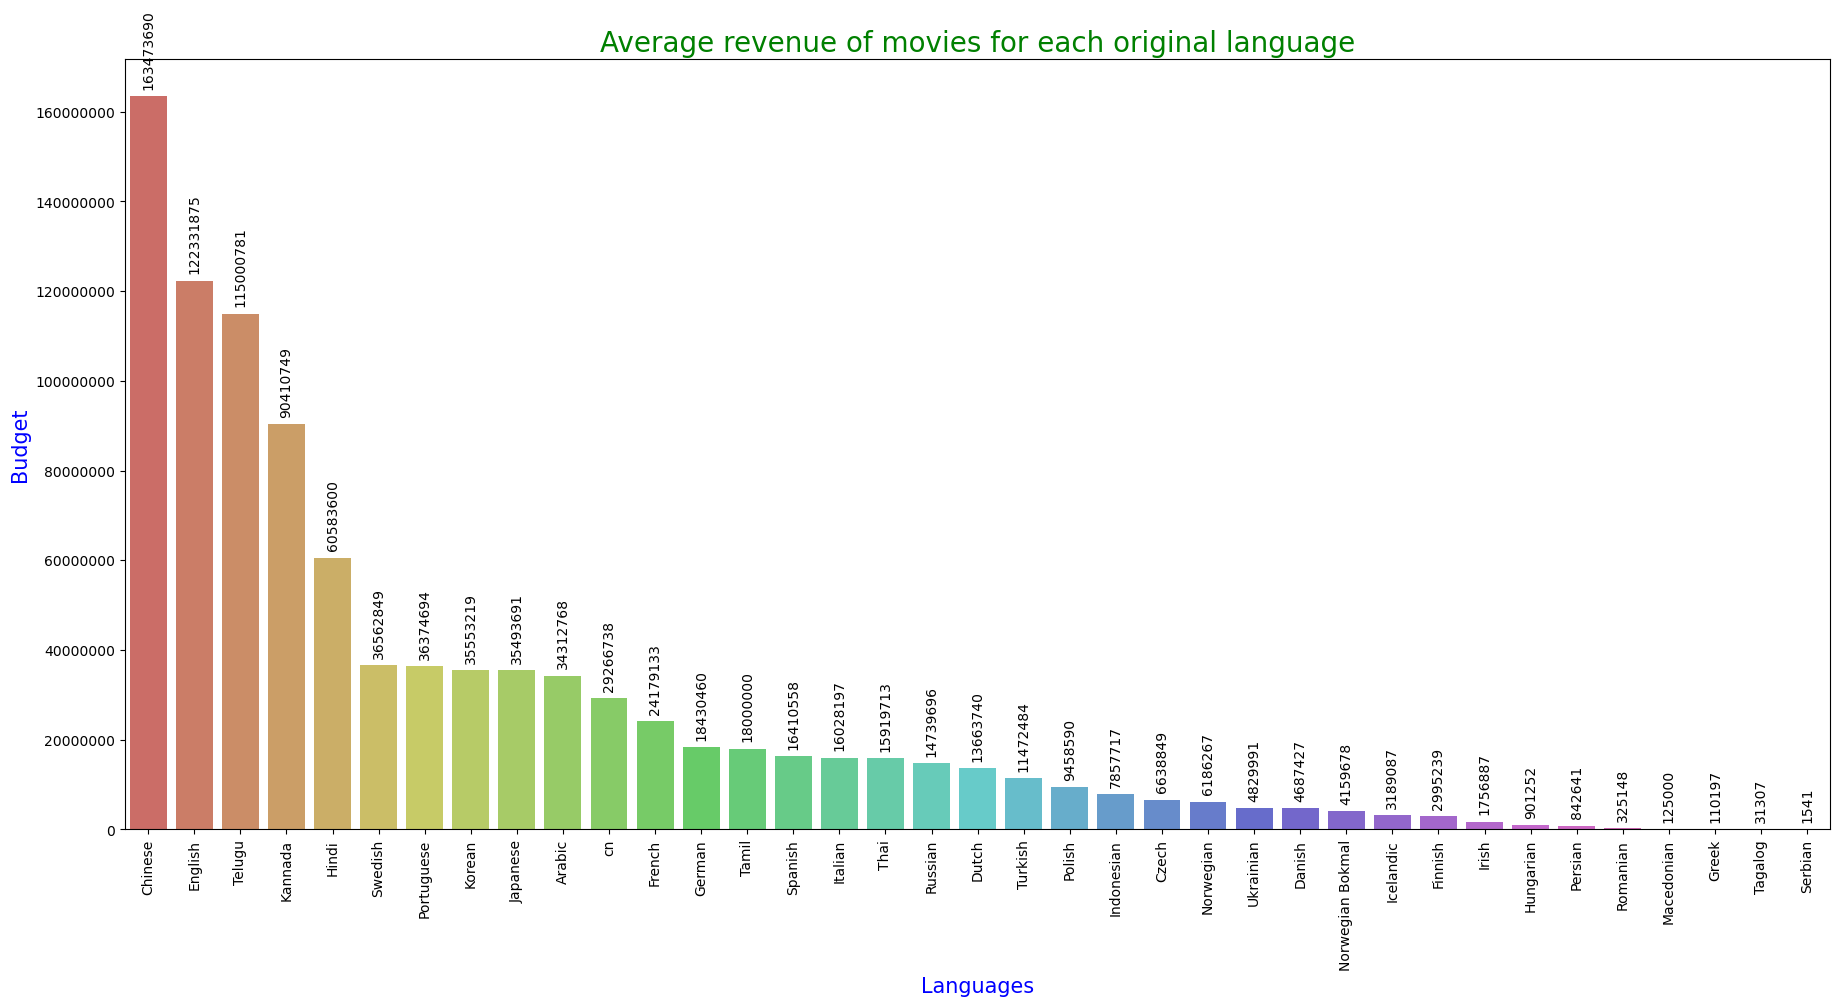

In [45]:
# average/mean revenue of all languages

plt.figure(figsize=(22,10))
ax = sns.barplot(x = 'original_language', y = 'revenue', data = rev_lan_mean_sorted, palette = 'hls')

# y_ticks values in complete figure
plt.ticklabel_format(style='plain', axis='y')

# values on bar in complete figures
ax.bar_label(ax.containers[0], fmt = '%d',rotation = 90,padding=5)

# title and labels
plt.title('Average revenue of movies for each original language',fontsize = 20, color='green')
plt.xlabel('Languages',fontsize = 15,color='blue')
plt.ylabel('Budget',fontsize = 15,color='blue')
plt.xticks(rotation = 90)
plt.show()

## Finding other movies from unkown languages in the last barplot

In [46]:
xx = df.query("original_language == 'xx'")
xx

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime
6340,617932,Barbie,1977-01-01,[],xx,2.0,1,9.890,Barbie comes home from shopping. She takes her...,0,[],0,10
7837,922902,Vertigo,2016-08-10,['Drama'],xx,2.0,1,10.093,One Person on the street does not vertigo when...,200,[],0,6


In [47]:
xx_info = xx.production_companies.reset_index()
xx_info

,index,production_companies
0,6340,[]
1,7837,[]


i was confused that which country has 'xx' language. </br> 
there is only two movies and not any complete detail.

In [48]:
cn = df.query("original_language == 'cn'")
cn

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime
89,32516,The Forbidden Legend: Sex & Chopsticks 2,2009-03-04,"['Comedy', 'Drama', 'Romance']",cn,6.2,74,255.110,Rich and powerful Simon Qing has been schooled...,0,"['Universal Media Studios', 'Twin Co. Ltd.', '...",0,93
138,67308,3-D Sex and Zen: Extreme Ecstasy,2011-04-14,"['Drama', 'Adventure', 'Romance', 'Action', 'H...",cn,4.8,86,204.230,Loosely based on a 17th century erotic Chinese...,3500000,"['One Dollar Production Limited', 'Local Produ...",10308238,105
431,60898,Erotic Ghost Story,1990-05-19,"['Fantasy', 'Drama', 'Horror']",cn,6.0,28,85.259,"Three vixens have meditated for 1,000 years to...",0,['Diagonal Pictures'],0,88
580,146312,The Spiritual Love,1992-11-26,"['Horror', 'Fantasy']",cn,5.5,1,87.475,Pleasing the libidos leads to intimate encount...,0,"['Lucky Star (H.K.) Film Co.', 'Filmline Enter...",0,75
804,410119,Yu Pui Tsuen II,1987-10-15,"['Drama', 'Fantasy', 'Romance']",cn,6.2,3,56.151,Before Michael Mak’s Sex And Zen became a cult...,0,[],0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,18665,High Risk,1995-07-12,"['Action', 'Comedy']",cn,6.7,107,8.314,After failing to save his wife from 'The Docto...,0,"[""Wong Jing's Workshop""]",0,101
9688,32629,A Chinese Torture Chamber Story,1994-05-19,"['Horror', 'Drama', 'Adventure', 'Comedy']",cn,5.5,31,10.731,A corrupt magistrate subjects a innocent young...,0,"[""Wong Jing's Workshop Ltd.""]",0,93
9736,531380,Golden Job,2018-09-20,"['Action', 'Adventure', 'Crime']",cn,6.5,80,10.455,A group of former mercenaries reunite to plan ...,0,"['Art Top Movie Productions', ""Jing's Producti...",0,100
9795,172752,Cash on Delivery,1992-04-30,"['Drama', 'Comedy']",cn,3.5,5,9.688,tells the story of a rookie gigolo (Michael Ch...,0,['Hong Hai Film Productions Limited'],0,95


Seems like 'cn' is another abreviation for a language from China, Hong Kong or for movies from both

## Final thoughts

I thought that movies in english would dominate most of the analysis, because they probably are mostly from USA, but I had to consider as well that India and China are huge markets, and the one and only movie in Telugu proves that point, because it is from India and dominated lots of visualizations, specially those with based on averages.